In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.impute import SimpleImputer

In [3]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
data = pd.read_csv(url)

In [4]:
#Use only numeric features (drop non-numeric ones)
numerical_data = data.select_dtypes(include=[np.number])

#Handle missing values if any
imputer = SimpleImputer(strategy='mean')
numerical_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)

#Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [5]:
#Apply K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)

#Add cluster labels to original data
data['Cluster'] = kmeans.labels_

In [6]:
#Evaluate performance
inertia = kmeans.inertia_
silhouette = silhouette_score(scaled_data, kmeans.labels_)
dbi = davies_bouldin_score(scaled_data, kmeans.labels_)

K = 3
Inertia (WCSS): 139.82
Silhouette Score: 0.460
Davies-Bouldin Index: 0.834


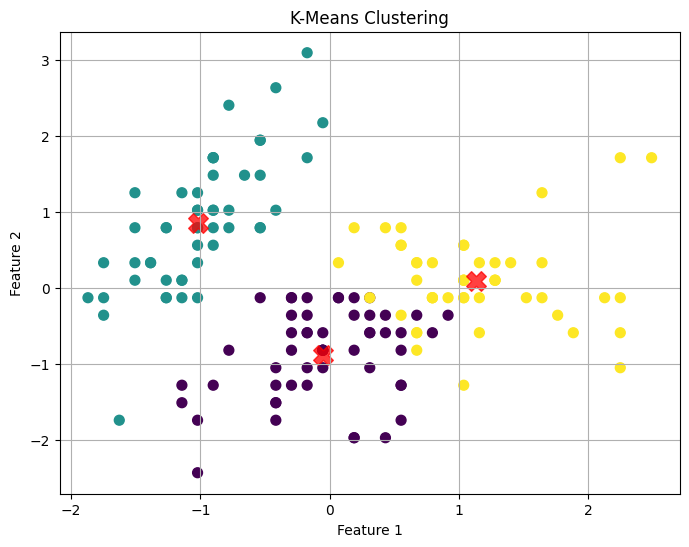

In [7]:
#Output metrics
print(f"K = {k}")
print(f"Inertia (WCSS): {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")

#Plot clusters using first two features
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()